In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_read=pd.read_csv(city_data_to_load)
ride_data_read=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_data = pd.DataFrame(city_data_read, columns=["city","driver_count","type"])
ride_data = pd.DataFrame(ride_data_read, columns=["city","date","fare","ride_id"])
merged_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
grouped_by_type=merged_data.groupby(["type"])
grouped_by_type.tail()

,city,driver_count,type,date,fare,ride_id
1620,Roberthaven,47,Urban,2018-01-28 10:23:03,21.72,7329967171497
1621,Roberthaven,47,Urban,2018-01-28 22:09:44,28.11,6228196244648
1622,Roberthaven,47,Urban,2018-05-03 05:43:29,42.15,2593369705849
1623,Roberthaven,47,Urban,2018-01-15 21:25:59,30.42,5912507910247
1624,Roberthaven,47,Urban,2018-05-02 21:36:24,21.80,3456705475174
2245,North Jeffrey,11,Suburban,2018-01-10 19:17:37,33.85,8089408327447
2246,North Jeffrey,11,Suburban,2018-02-16 19:18:44,26.66,7469051494160
2247,North Jeffrey,11,Suburban,2018-03-19 06:00:46,31.16,2458737372712
2248,North Jeffrey,11,Suburban,2018-02-21 12:56:58,22.96,6853853007740
2249,North Jeffrey,11,Suburban,2018-04-27 10:17:26,20.41,903066642569


## Bubble Plot of Ride Sharing Data

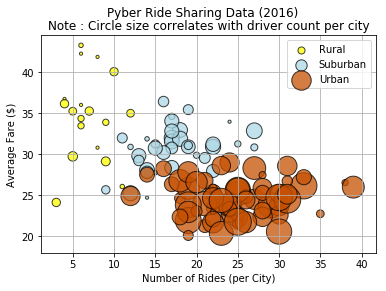

In [3]:
by_city = merged_data.groupby("city")
avg_fare = by_city.mean()["fare"]
rides_count = by_city["ride_id"].count()
drivers_count = by_city.mean()["driver_count"]
city_type = city_data.set_index("city")["type"]

# dataframe
city_info = pd.DataFrame({
    "Number of Rides": rides_count,
    "Average Fare": avg_fare,
    "Number of Drivers": drivers_count,
    "Type of City": city_type})

#city type dfs
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = 'yellow', edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = 'lightblue', edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = '#c65102', edgecolor = 'black', label = 'Urban', alpha = .75)

#plot options
plt.title('Note : Circle size correlates with driver count per city')
plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.grid()
plt.legend()

plt.show()

In [6]:
# Show plot
indexed_data=merged_data.set_index("type").groupby(["type"])


## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x11b553da0>,
 [Text(-0.973582,0.511994,'Rural'),
  Text(-0.850539,-0.697556,'Suburban'),
  Text(1.0683,0.546573,'Urban')],
 [Text(-0.531045,0.27927,'6.8%'),
  Text(-0.46393,-0.380485,'30.5%'),
  Text(0.623173,0.318834,'62.7%')])

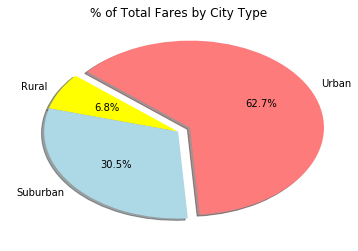

In [7]:
# Calculate Type Percents
grouped_data_fares=merged_data.set_index("type").groupby(["type"])
total_fares_per_city=grouped_data_fares["fare"].sum()/merged_data["fare"].sum()
labels=merged_data.groupby(["type"]).sum().index
# Build Pie Chart
plt.title("% of Total Fares by City Type")
colors=["yellow","lightblue","#fe7b7c"]
explode = (0,0,0.1)
plt.pie(total_fares_per_city, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode,shadow=True,startangle=140)

# Save Figure


## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x11b5fce48>,
 [Text(-0.947536,0.558727,'Rural'),
  Text(-0.986001,-0.48765,'Suburban'),
  Text(1.14853,0.347682,'Urban')],
 [Text(-0.516838,0.30476,'5.3%'),
  Text(-0.537819,-0.265991,'26.3%'),
  Text(0.669975,0.202815,'68.4%')])

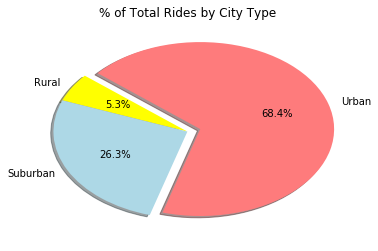

In [8]:
# Calculate Ride Percents
grouped_data_rides=merged_data.set_index("type").groupby(["type"])
total_rides_per_city=indexed_data["ride_id"].count()
labels=merged_data.groupby(["type"]).count().index
labels
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(total_rides_per_city, labels=labels, autopct="%1.1f%%", shadow=True, colors=colors,explode=explode,startangle=140)
# Save Figure


## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x11b6b26a0>,
 [Text(-0.859754,0.686165,'Rural'),
  Text(-1.06382,0.279787,'Suburban'),
  Text(1.15269,-0.333622,'Urban')],
 [Text(-0.468957,0.374272,'0.8%'),
  Text(-0.580267,0.152611,'12.5%'),
  Text(0.672403,-0.194613,'86.7%')])

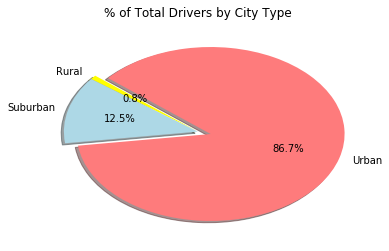

In [9]:
# Calculate Driver Percents
grouped_data_rides=merged_data.set_index("type").groupby(["type"])
total_drivers_per_city=indexed_data["driver_count"].sum()
labels=merged_data.groupby(["type"]).count().index
labels
# Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers_per_city, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode,colors=colors,startangle=140)
# Save Figure
